## Aplicativo que coleta dados de fundos imobiliários na internet!

### Coletando arquivo .csv do site da b3

Importanto das bibliotecas necessárias

In [19]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
import matplotlib.pyplot as plt
import time
import os

Definindo o caminho da pasta que o download vai o nome do arquivo que será salvo

In [20]:
base_dir = os.getcwd()
download_dir = os.path.join(base_dir, "../bases_originais")

Verificando se já existe um arquivo com o nome que iremos baixar na pasta, se tiver, excluir

In [21]:
if not os.path.exists(download_dir):
    os.makedirs(download_dir)

download_archive_name = os.path.join(download_dir, "statusinvest-busca-avancada.csv")

if os.path.exists(download_archive_name):
    os.remove(download_archive_name)
print(download_archive_name)


c:\Users\enzot\OneDrive\Documentos\Dev\Impacta\Web Data App\AP1\Scripts\../bases_originais\statusinvest-busca-avancada.csv


Configurando as opções do navegador google chrome

In [22]:
# Configurando as opções do Chrome
chrome_options = Options()
# Configurando as preferências para definir a pasta de download
prefs = {
    "download.default_directory": os.path.abspath(download_dir),  # Diretório de download
    "download.prompt_for_download": False,       # Não perguntar onde salvar o arquivo
    "directory_upgrade": True,                   # Atualizar o diretório de download, se necessário
    "safebrowsing.enabled": True,                # Ignorar avisos de arquivos inseguros        
}
chrome_options.add_experimental_option("prefs", prefs)

Abrir chrome com as configurações selecionadas

In [23]:
navegador = webdriver.Chrome(options=chrome_options)

Abrir o site da b3

In [24]:
navegador.get("https://statusinvest.com.br/fundos-imobiliarios/busca-avancada")

Baixar o arquivo CSV (já salvando no caminho escolhido anteriormente)

In [25]:
navegador.find_element(By.XPATH, '/html/body/main/div[3]/div/div/div/button[2]').click()


In [26]:
try:
    time.sleep(5)
    navegador.find_element(By.XPATH, '/html/body/div[20]/div/div/div[1]/button/i').click()
except:
    print('Não apareceu propaganda')

Não apareceu propaganda


In [27]:
navegador.find_element(By.XPATH, '/html/body/main/div[4]/div/div[1]/div[2]/a/span').click()

In [28]:
navegador.get("https://statusinvest.com.br/indices")

In [29]:
cdi = navegador.find_element(By.XPATH, '/html/body/main/div[2]/div/div/div/table/tbody/tr[4]/td[2]').text
ifixS = navegador.find_element(By.XPATH, '/html/body/main/div[4]/div/div/div/table/tbody/tr[2]/td[2]/div/span').text

### Criando dataframe com o arquivo csv
Importando bibliotecas

In [30]:
import pandas as pd
import numpy as np

Lendo o csv, separado por ; usando o encoding latin1(diferente do utf-8), ignorando a primeira linha (cabeçalho que estava com configurações diferentes do padrão do documento csv)

In [31]:
if os.path.exists(download_archive_name):
    df = pd.read_csv('../bases_originais/statusinvest-busca-avancada.csv', sep=";",)
else:
   time.sleep(5)
   df = pd.read_csv('../bases_originais/statusinvest-busca-avancada.csv', sep=";")
df.head()

,TICKER,PRECO,ULTIMO DIVIDENDO,DY,VALOR PATRIMONIAL COTA,P/VP,LIQUIDEZ MEDIA DIARIA,PERCENTUAL EM CAIXA,CAGR DIVIDENDOS 3 ANOS,CAGR VALOR CORA 3 ANOS,PATRIMONIO,N COTISTAS,GESTAO,N COTAS
0,ABCP11,"75,89","0,700000","9,22","106,92","0,71","58.177,91","1,83","1,47","7,04","503.496.718,25","15.558,00",Passiva,"4.709.082,00"
1,AFHI11,"94,51","0,930000","13,19","95,58","0,99","1.109.564,82","9,19","-8,71","0,34","435.416.167,85","42.404,00",Ativa,"4.555.618,00"
2,AIEC11,"42,42","0,620000","20,46","84,75","0,50","649.803,64","3,71","-1,13","-15,31","408.907.306,13","18.699,00",Ativa,"4.824.987,00"
3,AJFI11,"7,29","0,070000","11,52","12,25","0,60","631.469,23","0,70",NaN,NaN,"387.523.963,60","13.438,00",Ativa,"31.625.978,00"
4,ALMI11,"577,11","5,000000","2,47","2.172,91","0,27","24.991,77","4,23",NaN,"-16,77","241.578.065,81","2.105,00",Passiva,"111.177,00"


## Tratando a base

In [32]:
import matplotlib.pyplot as plt

In [33]:
dfnovo = df

In [34]:
dfnovo['PRECO'] = df['PRECO'].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)
dfnovo['ULTIMO DIVIDENDO'] = df['ULTIMO DIVIDENDO'].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)
dfnovo['DY'] = df['DY'].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)
dfnovo['VALOR PATRIMONIAL COTA'] = df['VALOR PATRIMONIAL COTA'].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)
dfnovo['P/VP'] = df['P/VP'].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)
dfnovo['LIQUIDEZ MEDIA DIARIA'] = df['LIQUIDEZ MEDIA DIARIA'].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)
dfnovo['PERCENTUAL EM CAIXA'] = df['PERCENTUAL EM CAIXA'].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)
dfnovo['CAGR DIVIDENDOS 3 ANOS'] = df['CAGR DIVIDENDOS 3 ANOS'].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)
dfnovo[' CAGR VALOR CORA 3 ANOS'] = df[' CAGR VALOR CORA 3 ANOS'].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)
dfnovo['PATRIMONIO'] = df['PATRIMONIO'].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)
dfnovo['N COTISTAS'] = df['N COTISTAS'].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)
dfnovo[' N COTAS'] = df[' N COTAS'].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)


In [35]:
dfnovo.head()

,TICKER,PRECO,ULTIMO DIVIDENDO,DY,VALOR PATRIMONIAL COTA,P/VP,LIQUIDEZ MEDIA DIARIA,PERCENTUAL EM CAIXA,CAGR DIVIDENDOS 3 ANOS,CAGR VALOR CORA 3 ANOS,PATRIMONIO,N COTISTAS,GESTAO,N COTAS
0,ABCP11,75.89,0.70,9.22,106.92,0.71,58177.91,1.83,1.47,7.04,5.034967e+08,15558.0,Passiva,4709082.0
1,AFHI11,94.51,0.93,13.19,95.58,0.99,1109564.82,9.19,-8.71,0.34,4.354162e+08,42404.0,Ativa,4555618.0
2,AIEC11,42.42,0.62,20.46,84.75,0.50,649803.64,3.71,-1.13,-15.31,4.089073e+08,18699.0,Ativa,4824987.0
3,AJFI11,7.29,0.07,11.52,12.25,0.60,631469.23,0.70,NaN,NaN,3.875240e+08,13438.0,Ativa,31625978.0
4,ALMI11,577.11,5.00,2.47,2172.91,0.27,24991.77,4.23,NaN,-16.77,2.415781e+08,2105.0,Passiva,111177.0


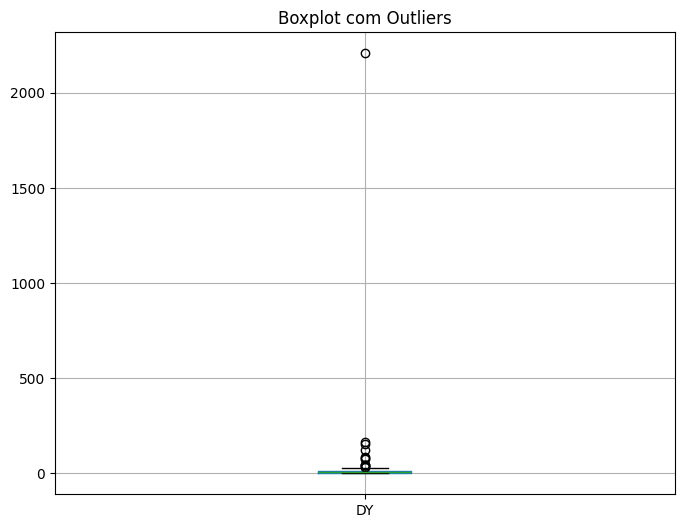

In [36]:
plt.figure(figsize=(8, 6))
dfnovo.boxplot(column=['DY'])
plt.title("Boxplot com Outliers")
plt.show()


In [37]:
dfnovo.to_csv('../bases_tratadas/fiis.csv', encoding='utf-8', sep=';')

In [38]:
df = pd.read_csv('../bases_tratadas/fiis.csv', encoding='utf-8', sep=';')
df.columns

Index(['Unnamed: 0', 'TICKER', 'PRECO', 'ULTIMO DIVIDENDO', 'DY',
       'VALOR PATRIMONIAL COTA', 'P/VP', 'LIQUIDEZ MEDIA DIARIA',
       'PERCENTUAL EM CAIXA', 'CAGR DIVIDENDOS 3 ANOS',
       ' CAGR VALOR CORA 3 ANOS', 'PATRIMONIO', 'N COTISTAS', 'GESTAO',
       ' N COTAS'],
      dtype='object')

In [39]:
listaifix = [ifixS]
listacdi = [cdi]

dicindex = {'ifix': listaifix, 'CDI': listacdi}
dfindex = pd.DataFrame(dicindex)
dfindex.to_csv('../bases_tratadas/indice.csv', sep=';')